# Exploratory Data Analysis in ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\loan.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(480, 13)

In [9]:
df.fillna(method="bfill")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### One hot Encoding

In [10]:
en_data = df[["Gender","Married"]]

In [11]:
pd.get_dummies(en_data)

,Gender_Female,Gender_Male,Married_No,Married_Yes
1,False,True,False,True
2,False,True,False,True
3,False,True,False,True
4,False,True,True,False
5,False,True,False,True
...,...,...,...,...
609,True,False,True,False
610,False,True,False,True
611,False,True,False,True
612,False,True,False,True


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
ohe = OneHotEncoder()
ar = ohe.fit_transform(en_data).toarray()


In [14]:
pd.DataFrame(ar, columns = ["Gender_Female","Gender_Male","Married_No" ,"Married_Yes"])

,Gender_Female,Gender_Male,Married_No,Married_Yes
0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
475,1.0,0.0,1.0,0.0
476,0.0,1.0,0.0,1.0
477,0.0,1.0,0.0,1.0
478,0.0,1.0,0.0,1.0


### Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
la= LabelEncoder()
la.fit_transform(df["Property_Area"])


array([0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2,
       2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 0,
       1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2,
       1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0,
       2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0,
       1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 2, 2, 0, 2, 0,
       0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 1,
       0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2,

In [17]:
df["Property_Area"] = la.transform(df["Property_Area"])


In [18]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,2,Y


In [19]:
la.fit_transform(df["Education"])
df["Education"] = la.transform(df["Education"])

In [20]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,Male,Yes,2,0,Yes,5417,4196.0,267.0,360.0,1.0,2,Y


In [21]:
df["Loan_Status"].unique()

array(['N', 'Y'], dtype=object)

### Ordinal Encoding

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
data_ord = [["N","Y"]]

In [24]:
oe = OrdinalEncoder(categories= data_ord)
df["Loan_Status"] = oe.fit_transform(df[["Loan_Status"]])

In [25]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,0,0.0
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,2,1.0
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,2,1.0
4,LP001008,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,2,1.0
5,LP001011,Male,Yes,2,0,Yes,5417,4196.0,267.0,360.0,1.0,2,1.0


In [26]:
df["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
df["Married"].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
data_ord2 = [["No","Yes"]]

In [29]:
oe = OrdinalEncoder(categories= data_ord2)
df["Self_Employed"] = oe.fit_transform(df[["Self_Employed"]])
df["Married"] = oe.fit_transform(df[["Married"]])

In [30]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,1.0,1,0,0.0,4583,1508.0,128.0,360.0,1.0,0,0.0
2,LP001005,Male,1.0,0,0,1.0,3000,0.0,66.0,360.0,1.0,2,1.0
3,LP001006,Male,1.0,0,1,0.0,2583,2358.0,120.0,360.0,1.0,2,1.0
4,LP001008,Male,0.0,0,0,0.0,6000,0.0,141.0,360.0,1.0,2,1.0
5,LP001011,Male,1.0,2,0,1.0,5417,4196.0,267.0,360.0,1.0,2,1.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    float64
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int32  
 5   Self_Employed      480 non-null    float64
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int32  
 12  Loan_Status        480 non-null    float64
dtypes: float64(7), int32(2), int64(1), object(3)
memory usage: 48.8+ KB


### Outlier Detection 

In [32]:
df.describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.647917,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


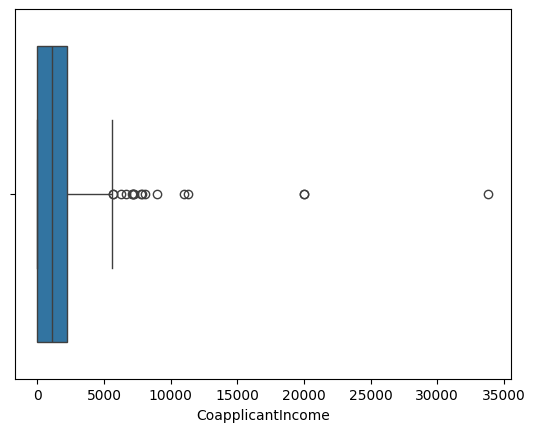

In [33]:
plt.figsize=(15,5)
sns.boxplot(x= df["CoapplicantIncome"],data =df)
plt.show()

### Outlier Detection AND REMOVAL USING iqr

In [34]:
df.shape

(480, 13)

In [35]:
q1 = df["CoapplicantIncome"].quantile(0.25)
q3 = df["CoapplicantIncome"].quantile(0.75)

In [36]:
iqr = q3 - q1

In [37]:
min_range = q1 - (1.5* iqr)
max_range = q3 + (1.5* iqr)
min_range ,max_range

(-3379.875, 5633.125)

In [38]:
df = df[df["CoapplicantIncome"]<=max_range]
df.shape

(463, 13)

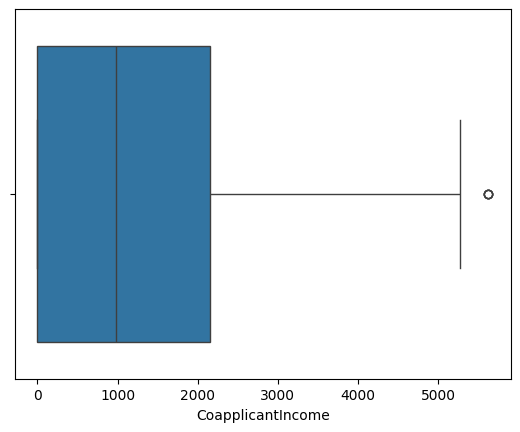

In [39]:
plt.figsize=(15,5)
sns.boxplot(x= df["CoapplicantIncome"],data =df)
plt.show()

### Outlier Detection AND REMOVAL USING Z- score

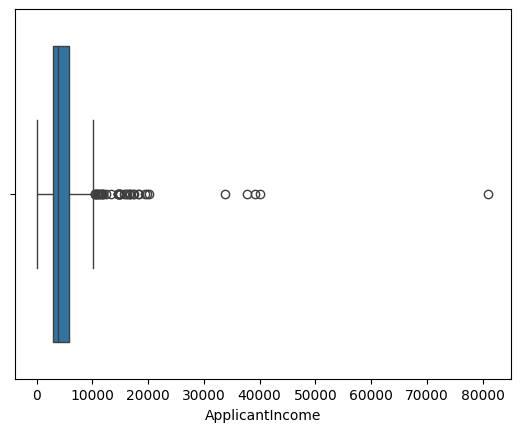

In [40]:
plt.figsize=(15,5)
sns.boxplot(x= df["ApplicantIncome"],data =df)
plt.show()

In [41]:
min_r  = df["ApplicantIncome"].mean() - (3*df["ApplicantIncome"].std())
max_r = df["ApplicantIncome"].mean() + (3*df["ApplicantIncome"].std())
min_r, max_r

(-11828.749984426096, 22614.322338637758)

In [42]:
df = df[df["ApplicantIncome"]<=max_r]
df.shape

(458, 13)

### Feature Scaling (Standardization)

C:\Users\User\AppData\Local\Temp\ipykernel_18200\4045153063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["ApplicantIncome"] )


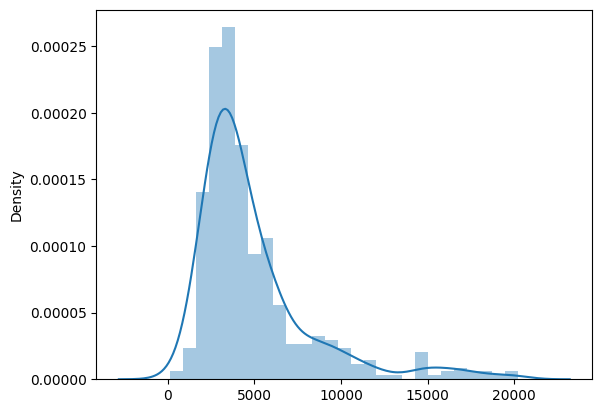

In [43]:
sns.distplot(x=df["ApplicantIncome"] )
plt.show()

In [44]:
df.describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,0.644105,0.209607,0.135371,4945.740175,1249.700699,139.683406,343.545852,0.858079,1.019651,0.696507
std,0.479307,0.407473,0.342494,3381.316450,1425.564440,72.848620,63.530029,0.349351,0.781099,0.460269
min,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2917.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,3854.000000,998.500000,126.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,5811.250000,2153.250000,162.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,20233.000000,5625.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [45]:
from sklearn.preprocessing import StandardScaler


In [46]:
ss = StandardScaler()
ss.fit(df[["ApplicantIncome"]])

StandardScaler()

In [47]:
df["ApplicantIncome"]= pd.DataFrame(ss.transform(df[["ApplicantIncome"]]), columns = ["x"])

In [48]:
df.describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,458.000000,458.000000,458.000000,339.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,0.644105,0.209607,0.135371,-0.001656,1249.700699,139.683406,343.545852,0.858079,1.019651,0.696507
std,0.479307,0.407473,0.342494,0.986711,1425.564440,72.848620,63.530029,0.349351,0.781099,0.460269
min,0.000000,0.000000,0.000000,-1.419857,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.588651,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,-0.313457,998.500000,126.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,0.258839,2153.250000,162.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,4.377120,5625.000000,600.000000,480.000000,1.000000,2.000000,1.000000


### Feature Scaling - normalization  (min-max scaling)

C:\Users\User\AppData\Local\Temp\ipykernel_18200\550048150.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["CoapplicantIncome"] )


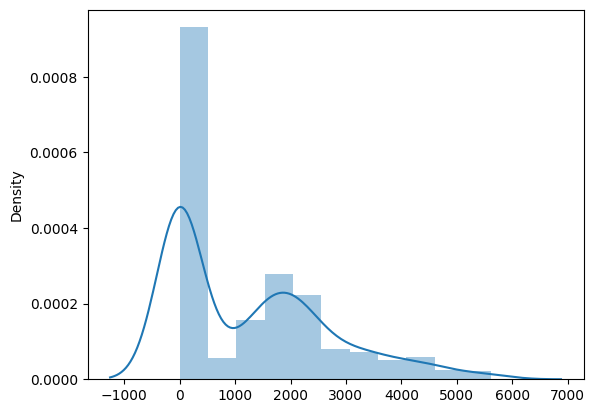

In [49]:
sns.distplot(x=df["CoapplicantIncome"] )
plt.show()

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
ms = MinMaxScaler()
ms.fit(df[["CoapplicantIncome"]])

MinMaxScaler()

In [52]:
df["CoapplicantIncome"]=  ms.transform(df[["CoapplicantIncome"]])

In [53]:
df.describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,458.000000,458.000000,458.000000,339.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,0.644105,0.209607,0.135371,-0.001656,0.222169,139.683406,343.545852,0.858079,1.019651,0.696507
std,0.479307,0.407473,0.342494,0.986711,0.253434,72.848620,63.530029,0.349351,0.781099,0.460269
min,0.000000,0.000000,0.000000,-1.419857,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.588651,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,-0.313457,0.177511,126.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,0.258839,0.382800,162.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,4.377120,1.000000,600.000000,480.000000,1.000000,2.000000,1.000000


### Handling Duplicated data

In [54]:
df.duplicated().sum()

0

In [55]:
import pandas as pd

# Define a base dictionary
base_dict = {
    'Name': ['John Doe', 'Jane Smith', 'John Doe', 'Alice Brown', 'Bob Johnson'],
    'Age': [30, 25, 30, 28, 40],
    'Occupation': ['Engineer', 'Doctor', 'Engineer', 'Artist', 'Chef'],
    'City': ['New York', 'Los Angeles', 'New York', 'Chicago', 'San Francisco'],
    'Country': ['USA', 'USA', 'USA', 'USA', 'USA'],
    'Email': ['john.doe@example.com', 'jane.smith@example.com', 'john.doe@example.com', 'alice.brown@example.com', 'bob.johnson@example.com'],
    'Phone': ['123-456-7890', '234-567-8901', '123-456-7890', '345-678-9012', '456-789-0123']
}

# Create DataFrame with the base dictionary
dt = pd.DataFrame(base_dict)

# Duplicate the rows to reach a total of 15 rows
dt = pd.concat([dt] * 3, ignore_index=True)

# Display the DataFrame
print(dt)


           Name  Age Occupation           City Country  \
0      John Doe   30   Engineer       New York     USA   
1    Jane Smith   25     Doctor    Los Angeles     USA   
2      John Doe   30   Engineer       New York     USA   
3   Alice Brown   28     Artist        Chicago     USA   
4   Bob Johnson   40       Chef  San Francisco     USA   
5      John Doe   30   Engineer       New York     USA   
6    Jane Smith   25     Doctor    Los Angeles     USA   
7      John Doe   30   Engineer       New York     USA   
8   Alice Brown   28     Artist        Chicago     USA   
9   Bob Johnson   40       Chef  San Francisco     USA   
10     John Doe   30   Engineer       New York     USA   
11   Jane Smith   25     Doctor    Los Angeles     USA   
12     John Doe   30   Engineer       New York     USA   
13  Alice Brown   28     Artist        Chicago     USA   
14  Bob Johnson   40       Chef  San Francisco     USA   

                      Email         Phone  
0      john.doe@example.com

In [56]:
dt.head(5)

,Name,Age,Occupation,City,Country,Email,Phone
0,John Doe,30,Engineer,New York,USA,john.doe@example.com,123-456-7890
1,Jane Smith,25,Doctor,Los Angeles,USA,jane.smith@example.com,234-567-8901
2,John Doe,30,Engineer,New York,USA,john.doe@example.com,123-456-7890
3,Alice Brown,28,Artist,Chicago,USA,alice.brown@example.com,345-678-9012
4,Bob Johnson,40,Chef,San Francisco,USA,bob.johnson@example.com,456-789-0123


In [57]:
dt.duplicated().sum()

11

In [58]:
dt.drop_duplicates(inplace = True)

In [59]:
dt.shape

(4, 7)

### Replace and change data type

In [60]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,1.0,1,0,0.0,-0.576068,0.268089,128.0,360.0,1.0,0,0.0
2,LP001005,Male,1.0,0,0,1.0,-0.699527,0.000000,66.0,360.0,1.0,2,1.0
3,LP001006,Male,1.0,0,1,0.0,0.312131,0.419200,120.0,360.0,1.0,2,1.0
4,LP001008,Male,0.0,0,0,0.0,0.139524,0.000000,141.0,360.0,1.0,2,1.0
5,LP001011,Male,1.0,2,0,1.0,-0.773544,0.745956,267.0,360.0,1.0,2,1.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            458 non-null    object 
 1   Gender             458 non-null    object 
 2   Married            458 non-null    float64
 3   Dependents         458 non-null    object 
 4   Education          458 non-null    int32  
 5   Self_Employed      458 non-null    float64
 6   ApplicantIncome    339 non-null    float64
 7   CoapplicantIncome  458 non-null    float64
 8   LoanAmount         458 non-null    float64
 9   Loan_Amount_Term   458 non-null    float64
 10  Credit_History     458 non-null    float64
 11  Property_Area      458 non-null    int32  
 12  Loan_Status        458 non-null    float64
dtypes: float64(8), int32(2), object(3)
memory usage: 46.5+ KB


In [62]:
df["Dependents"].value_counts()

Dependents
0     266
2      80
1      75
3+     37
Name: count, dtype: int64

In [63]:
df["Dependents"].replace("3+","3", inplace = True)

In [64]:
df["Dependents"].value_counts()

Dependents
0    266
2     80
1     75
3     37
Name: count, dtype: int64

In [66]:
df["Dependents"]= df["Dependents"].astype("int64")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            458 non-null    object 
 1   Gender             458 non-null    object 
 2   Married            458 non-null    float64
 3   Dependents         458 non-null    int64  
 4   Education          458 non-null    int32  
 5   Self_Employed      458 non-null    float64
 6   ApplicantIncome    339 non-null    float64
 7   CoapplicantIncome  458 non-null    float64
 8   LoanAmount         458 non-null    float64
 9   Loan_Amount_Term   458 non-null    float64
 10  Credit_History     458 non-null    float64
 11  Property_Area      458 non-null    int32  
 12  Loan_Status        458 non-null    float64
dtypes: float64(8), int32(2), int64(1), object(2)
memory usage: 46.5+ KB
